In [61]:
# Подключение библиотек
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from math import sqrt
from scipy import stats
from scipy.stats import t, norm

%matplotlib inline
%config InlineBackend.figure_format = 'png'
rcParams['figure.figsize'] = 10, 8

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

<h1 style="color:black" align="center">2. Сравнение средних</h1>

<h1 style="color:black" align="center">2.1 T-распределение</h1>


**Вспоминаем ЦП**
Мы познакомились с основной идеей статистической проверки гипотез. Основываясь на ЦП мы могли бы предположить, как бы вели себя все выборочные средние, если бы мы многократно повторяли наш эксперемент и основываясь на этой информации рассчитать вероятность получить такое или ещё более выраженное отклонение, чем в нашем исследовании.

Ещё раз обратимся к ЦП теореме. Если мы знаем, что в нашей ГС $\mu = 0$ и $\sigma = 1$ и мы многократно извлекаем выборки из нашей ГС, то все средние значения этих выборок распределятся нормальныи образом вокруг среднего ГС ($\mu$) и со стандартныи отклонением (стандартная ошибка среднего) этого распределения, которую можно рассчитать по следующей формуле:

$\large se = \frac{\sigma}{\sqrt{N}}$

Когда у нас большое количество наблюдений, стандартное отклонение ($sd$) по выборке хорошо описывет соответствующий параметр ГС ($\sigma$), что позволяет нам преобразовать формулу стандартной ошибки среднего $se$ в следющий вид для выборки:

$\large se = \frac{sd}{\sqrt{N}}$

**Что если число наблюдений в выборке оказется небольшим?**
При большом количестве наблюдений все выборочные средние будут вести себя в соответствии с нормальный распределением. Однако, когда количество наблюдей становится небольшим, особенно когда число наблюдений меньше 30. В этом случае стандартное отклонение по выборке не является хорошим показателем соответствующего параметра ГС ($\sigma$), так как он начинает больше отклоняется от него. Например, в такой ситуцации стандартное отклонение может быть равно $1.53$, когда в ГС стандартное отклонение равно 1. А что более важно, что нарушается предположение о том, что все выборочные средние будут вести себя в соответствии с нормальным законом (ЦПТ).

Причиной таких последствий является маленький объём выборки из-за чего она может оказаться в разных частях распределения, что и смещает все параметры. То есть, чем меньше объём нашей выборки, тем более сильные отклонения от среднего ГС мы будем получать.

**Распределение Стьюдента:** Если число наблюдений невелико и $\sigma$ неизвестно (почти всегда), используется распределение Стьюдента (t-distribution).

Давайте посмотрим, чем оно отличается от нормлаьного распределения: нормальное распределение обозначено розовой линией, а всё остальное - это t-распределение. Основное отличие заключается в том, что у распределения стьюдента более высокие хвосты распределения. Это означает, что в диапозоне превышающем 2 стандартных отклонения в право и влево будет лежать больше наблюдений, чем у нормального распределения.

"Форма" распределения определяется числом степеней свободы (df = n - 1). С увеличением числа df распределение стремится к нормальному.

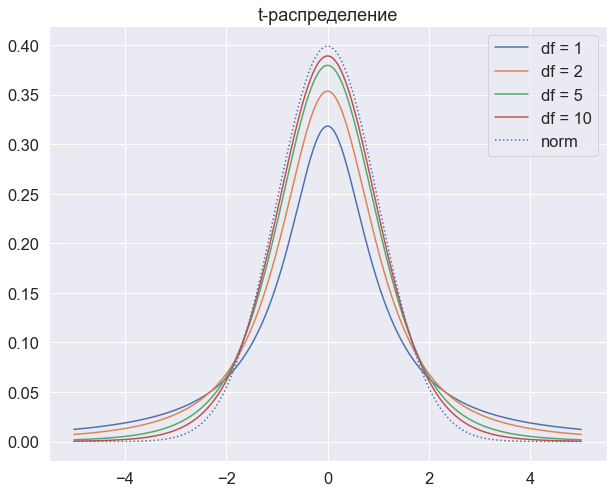

In [59]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.'''

x = np.linspace(-5, 5, 1000)

y4 = norm.pdf(x)

plt.title('t-распределение')

for df in [1, 2, 5, 10]:
    plt.plot(x, t.pdf(x, df=df), label=f'df = {df}')

    
plt.plot(x, y4, 'b:', label='norm')
plt.legend()
plt.show()

**Вывод:** В отличии от нормального распределения, где отклонение от среднего строго регламентированно. "Форма" t-распределения будет изменяться в зависимости от числа степеней свободы. То есть, получить более экстримальные отклонения от срденего значения будет более или менее вероятно в зависимости от того, какой объём выборки.

### Пример: 

Посмотрим как знание t-распределения влияет на проверку статиситческих гипотез. Допустим в ГС $\mu = 10$, на выборке мы получили следующие значения: $\bar{X} = 10.8, ~ sd = 2, ~ N = 25$. Если бы мы пользовались стандартной формулой, то мы бы сказали: в соответствии с ЦПТ все выборочные средние распределились бы нормально, вокруг срденего ГС и стандартную ошибку среднего (стандартное отклонение данного распределения) можно рассчитать:

$\large se = \frac{sd}{\sqrt{N}} = \frac{2}{\sqrt{25}} = 0.4$. 

Теперь необходимо узнать как далеко наше выборочное среднее отклонилось от сренего ГС в еденицах стандартного отклонения так как, если мы найдём данный параметр, то сможем рассчитать вероятность получить такое или ещё более выраженное отклонение. Для этого необходимо найти соответствующее Z-значение:

$\large Z_{10.8} = \frac{10.8 - 10}{0.4} = 2$ - в нашем эксперементе мы получили отклонение от предпологаемого срденего на два стандартных отклонения вправую сторону.

Найдём вероятность получить такое или ещё более выраженное отклонение:

In [3]:
# Для нормального распределения
2 * (stats.norm.cdf(-2))

0.04550026389635839

Получаем, что p-value меньше чем 0.05, поэтому мы можем отклонить нулевую гипотезу, согласно которой наша выборка принадлежит ГС со средним равным 10. Но как мы сказали, при небольшом объёме выборке распределение выборочных средних будет отличаться от нормального и вероятность получить более выраженные отклонения от среднего будет выше. Рассчитаем такую вероятность в случае t-распределения:

In [4]:
t_value = 2
n = 25
df = n - 1

p = 2 * (1 - stats.t.cdf(t_value, df))
p

0.056939849936591624

Исходя из этого, мы уже не можем отклонить нулевую гипотезу, так как p-value > 0.05. t-критерий рассчитывается также как и z-значение: 

$\large t_i = \frac{\bar{X_i} - \mu}{se}$

В случае z-значения мы делили на $\sigma$ но $se$ представляет из себя аналог только среди выборочных средних. И $\bar{X_i}$ - это выборочное срденее из которого мы вычитаем уже не выборочноее срденее, а среднее ГС.

<h1 style="color:#008B8B">О t-распределении</h1>

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен нормально (не обязательно) со средним $\mu$ и стандартным отклонением $\sigma$, и мы будем многократно извлекать выборки одинакового размера $n$, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:

$\large Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{N}}}$

то эта величина $z$ будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t-распределения.

$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{N}}}$

таким образом, в случае неизвестной $\sigma$ мы всегда будем иметь дело с t-распределением. На этом этапе вы должны с негодованием спросить меня, почему же мы применяли z-критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t - распределение совсем близко подбирается к нормальному распределению:

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

### Вопрос 1
"На этом этапе вы должны с негодованием спросить меня, почему же мы применяли z - критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?"

Я что-то совсем не пойму. Формула такая же как и в первом модуле. Что поменялось? Только то, что на сайте мы будем выбирать t-распределение вместо нормального?

<h3 align='center'>Ответ:</h3>

Вид формулы один, но смысл немного изменяется. Когда речь идет о $Z$ преобразовании, то мы работаем с среднеквадратическим отклонением $\sigma$:

$\large Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{N}}}$ (Формула 1.1)

В случае t-критерия используется стандартным отклонением $sd$:

$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{N}}}$ (Формула 1.2)

### Вопрос 2
В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

Вот эту задачу мы же решали по формуле  t - распределения?

<h3 align='center'>Ответ:</h3>

Ключевое отличие прошлой задачи заключается в том, что вид формулы был таковым:

$\large Z = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{N}}}$ (Формула 2.1)

Ну это явный вид формулы 1.2 t-критерия! Почему? Ну Формула 2.1 обозначается как Z, так как мы пользуемся свойствами нормального распределения.

При расчете стандартного отклонения выборочных средних или же стандартной ошибки среднего - мы в качестве среднеквадратического отклонения ГС используем стандартное отклонение нашей выборки, для оценки этого параметра:

$\large se = \frac{sd}{\sqrt{N}}$

Как и говорится в теме текущего степа и этой недели, что при количестве наблюдений больше 30, t-распределение стремится к нормальному, значит и его свойства тоже. Именно поэтому мы допустили себе использовать свойства нормального распределения, но все же, небольшое отличие будет. Поэтому в данном примере было бы правильно использовать свойства t-распределения. 

<h1 style="color:black" align="center">2.2 Сравнение двух средних</h1>
<h1 style="color:#008B8B">Критерий t-Стьюдента</h1>

Критерий, который позволяет сравнивать две выборки между собой (два выборочных средних), называется парный t-тест или просто, критерий t-Стьюдента.

Предположим, мы хотим сравнить два средних выборочных значения. $\bar{x_1}$ рассчитанное на выборке со стандартным отклоенеием $sd_1$ и с числом элементов $n_1$ и выборочное значение $\bar{x_2}$, которое также рассчитано основываясь на данных второй выборки $sd_2, n_2$.

Изначально необходимо сформулирвоать статистические гипотезы:

$H_0 - \mu_1 = \mu_2$ - лекарство не работает, выборки принадлежат одной ГС.

$H_1 - \mu_1 \ne \mu_2$ - лекарство работает, выборки принадлежат разным ГС.

Принимаем факт того, что верна нулевая гипотеза. Если мы много раз будем извлекать из ГС по паре выборок и каждый раз рассчитывали разность между двумя выборочными значениями $\bar{X_1} - \bar{X_2}$, то эта величина распределилась бы вокрут соответствующего значения в ГС. Если мы предположили что в ГС два средних равны, то и срденее значение разности двух средних равнялось бы нулю $\mu_1 - \mu_2 = 0$. При этом, стандартное отклонение (стандартная ошибка среднего) данного распределения рассчитывалась бы следующим образом:

$\large se = \sqrt{\frac{sd_1^2}{N_1} + \frac{sd_2^2}{N_2}}$

**Почему формула имеет такой вид?**

Дисперсия для данного распределнеия будет равна сумме дисперсии первой выборки и второй:

$\large D = D_1 + D_2$

Насколько мы знаем, что $SE = \sqrt{D}$. Но мы можем расписать нашу дисперсию следующим образом $\sqrt{D} = \sqrt{D_1 + D_2}$.

Но $se^2 = D$, так как $se$ - это корень из дисперсии. Следовательно стандартная ошибка данного распределения равна:

$\large SE = \sqrt{D} = \sqrt{D_1 + D_2} = \sqrt{SE_1^2 + SE_2^2}$

**Продолжим рассуждения**

При большом количестви наблюдений можно сказать что, распределение разности между двумя средними значениями приняло бы нормальный вид в соответствии с ЦПТ. Более точно, такое распределение будет соответствовать t-распределению с числом степеней свобод, которое рассчитывается:

$\large df = N_1 - 1 + N_2 - 1$

Основываясь на данной информации можно рассчитать, насколько далеко наша разность между двумя средними значениями отклонилась от предполагаемого показателя ГС. Тем самым можно рассчитать вероятность получить такие или ещё более выраженные различия при условии, что верна нулевая гипотеза.

Запишем формулу t-критерия: Для этого из нашей разности выборочных средних вычитаем соответствующее значение ГС (Аналогично, как до этого рассчитывался t-критерий)

$\large t = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{sd_1^2}{N} + \frac{sd_2^2}{N}}}$

Мы предположили, что средние в ГС у нас идентичны, поэтому разность в ГС для средних будет равнятся нулую $\mu_1 - \mu_2 = 0$, тем самым мы можем упросить нашу формлу:

$\large t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{sd_1^2}{N} + \frac{sd_2^2}{N}}}$

Рассчитав соответствующее t-значение и зная число степеней свобод, мы можем рассчитать p-value.

### Пример 1

Процесс денатурации ДНК представляет разрушение водородных связей между двумя цепями этой молекулы и очень сильно зависит от температуры, которой мы воздействуем на молекулу.

При сравнении двух видов между собой в исследовании были получены следующие различия в срденей температуре плавления ДНК: 

Вид 1 : $\bar{X} = 89.9, sd = 11,3, N = 20$

Вид 2 : $\bar{X} = 80.7, sd = 11,7, N = 20$

**Строим гипотезы:**

$\large H_0: \mu_{1 вид} = \mu_{2 вид}$

$\large H_2: \mu_{1 вид} \ne \mu_{2 вид}$

**Рассчитаем t-критерий:**


$\large t = \frac{89.9 - 80.7}{\sqrt{\frac{11.3^2}{20} + \frac{11.7^2}{20}}} = 2.5$

Тем самым, наша разность между средними отклонилась от предпологаемого значения в ГС  на 2.5 стандартных отклонений вправо. Давайте рассчитаем вероятность, получить такое или ещё более выраженное отклонение при условии, что верна нулевая гипотеза:

$\large df = 40 - 2 = 38$

p_value = 0.0167

p_value оказался меньше чем 0.05, значит мы обнаружили статистически значимые различия в средней температуре плавления двух видов.

<h1 style="color:#008B8B">Визуализация результатов</h1>

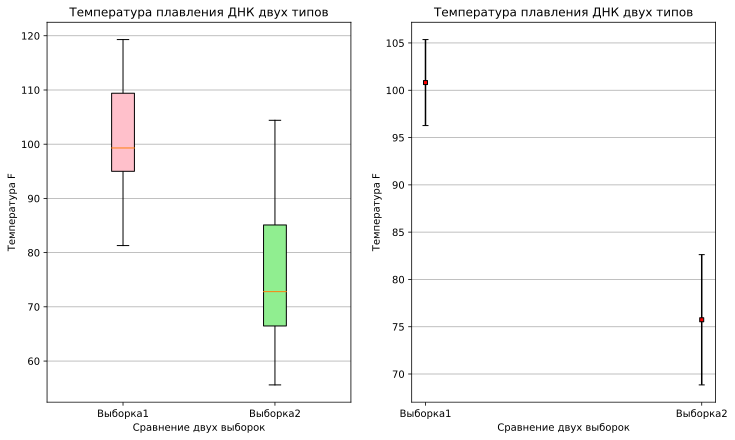

In [4]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

**Вывод:** Применяя критерий t-Стьюдента желательно чтоб дисперсия внутри наших групп были приблизительно одинаковыми - требование гомогенности дисперсий. Проверить данное требование можно используя критерий Левена и критерий Фишера.

Если объём выборки меньше 30, то важным требованием является нормальность распределния признаков наших двух выборок. Если количество наблюдей больше 30 и распределение отличается от нормального, то t-тест тоже хорошо справляется с поставленной задачей. 

(x1-x2)↑ → t↑ (чем больше разница между средними в выборках, тем больше t-критерий)

sd↓ → t↑

n↑ → t↑

t↑ → p↓

### Задача 1

Знание t-распределения поможет нам корректно рассчитать границы доверительного интервала, особенно в тех случаях, если число наблюдений меньше 30. Ранее при расчете 95% доверительного интервала мы использовали формулу $\bar{X}\pm 1,96 \cdot \frac{sd_{x}}{\sqrt{N}}$

Однако 95% всех наблюдений в случае t-распределения могут лежать в более широком диапазоне. 

Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:

$\large \bar{X}=89,9\quad sd=11,3\quad N=20$

Для этого определите, в каком диапазоне находится 95 % наблюдений у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96. 

Давайте воспользуемся таблицей критических значений для t - распределения для нахождения нужного t - значения:

http://www.medcalc.org/manual/t-distribution.php

В этой таблице нас интересует столбец, где A=0,95 (область под кривой). На пересечении этого столбца и строки с нужным числом степеней свободы и находится интересующее нас значение.

**Решение:**

В таблице по ссылке находим, в диапазоне скольких сигм от среднего находится 95% площади под кривой t-распределения. Ищем пересечение строки DF (в нашем случае количество степеней свободы равно 20-1=19) и столбца P=0.05 A=0.95. Находим значение, равное 2.093. То есть, в нашем t-распределении (для которого DF=19) 95% площади под кривой находится в диапазоне 2.093 сигм от среднего.
Теперь посчитаем ошибку среднего:

$\large se = {sd_{x} \over \sqrt{N}}={11.3 \over \sqrt{20}} = 2,526756815$

Итак, наш 95%-ный доверительный интервал должен выглядеть следующим образом:
$\overline{X}{\pm {2.093se}}$

Теперь рассчитаем границы доверительного интервала:

$\large \overline{X}+{2.093se}=89,9+{2.093}\times{2,526756815}=95,18850201\approx{95.19}$


$\large \overline{X}-{2.093se}=89,9-{2.093}\times{2,526756815}=84,61149799 \approx{84.61} $

Соответственно, наш 95%-ный доверительный интервал [84,61 ; 95,19].

### Задача 2

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.
Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.


**Примечание**

Рассчитав t - значение вы можете сравнить его с табличным, чтоб принять статистическое решение: отклонять ли нулевую гипотезу. http://www.medcalc.org/manual/t-distribution.php

Опять же обратимся к таблице t - значений, как и в предыдущем задании найдем критическое значение для нашего эксперимента (на пересечении строки c нужным числом степеней свободы  и столбца, где P=0.05). 
Если рассчитанное вами t-значение больше табличного: отклоняем нулевую гипотезу при p < 0.05.

**Решение:**

Сначала посчитаем ошибку среднего:

$\large se=\sqrt{\frac{sd_{1}^{2}}{N_1}+\frac{sd_{2}^{2}}{N_2}}={\sqrt{\frac{9^{2}}{100}+\frac{10^{2}}{100}}}=\sqrt{1.81}\approx 1.3453624$

А теперь рассчитаем t-значение (напомним, что при верности нулевой гипотезы две выборки принадлежат одной генеральной совокупности, а не двум разным, и потому разность средней генеральной совокупности, из которой взята первая выборка, и средней генеральной совокупности, из которой взята вторая выборка, будет равняться нулю, т.е. $M_1-M_2=0$, так как при верности нулевой гипотезы $M_1=M_2$):

$\large t=\frac{\overline{({X}_1}-\overline{{X}_2})-(M_1-M_2)}{se}=\frac{(45-34)-0}{1.3453624}=\frac{11}{1.3453624}\approx 8.17623564$

То есть, разность между средними двух выборок отклонилась на 8.17633564 сигм от предполагаемого значения генеральной совокупности.

Для расчёта p-значения нам также понадобится выяснить число степеней свободы:

$\large df=N_1+N_2-2=100+100-2=198$

Согласно таблице 95% площади под кривой нашего t-распределения находится в диапазоне примерно 1.972 сигм от среднего. Вместо df=198 для удобства взяли df=200.

1.972 сильно меньше 8.17623564. А это значит, что p-уровень значимости будет также меньше 0.05. То есть, такие отклонения (то есть отклонение в 8.17623564 сигм) при верности нулевой гипотезы будет мала. И мы можем ее отвергнуть.

<h1 style="color:black" align="center">2.4 Однофакторный дисперсионный анализ</h1>

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 

<h1 style="color:#008B8B">Как работает дисперсионный анализ:</h1>

Для хорошего понимания данного метода, будем использовать небольшой набор данных, где есть 3 группы и в каждой группе по 3 наблюдения:

In [89]:
data = pd.DataFrame({1: [3, 1, 2], 2:[5, 3, 4], 3: [7, 6, 5]})
data

,1,2,3
0,3,5,7
1,1,3,6
2,2,4,5


**Сформулируем наши гипотезы:**

$\large H_0: \mu_1 = \mu_2 = \mu_3$ - Между средними значениям нет никаких значимых различий.

$\large H_1: \mu_1 \ne \mu_2 \ne \mu_3$ - Хотя бы пара средних значимо различаются между собой.

Рассчитаем показатели, которые помогут определить, какая из гипотез является верной.

**Вычислим среднее значение всех наблюдений:**

Мы рассматриваем все наши наблюдения как одну группу:

$$\large \bar{X} = \frac{3 + 1 + 2 + 5 + 3 + 4 + 7 + 6 + 5}{9} = \frac{36}{9} = 4$$

Среднее значение всех наблюдений нужно для SST.

**Рассчёт SST:**

`SST (Общая сумма квадратов)` - Это показатель характерезует насколько высока изменчивость данных без разделения их на группы. Данный показатель напоминает дисперсию.

$$\large SST = \sum^{N}_{i=1} {(X_i - \bar{X})^2}$$

$$\large SST = (3-4)^2 + (1-4)^2 + \ldots + (5-4)^2 = 30$$

**Число степеней свободы:**

`Число степеней свободы` - это число независимых элементов, которые мы имеем при рассчёте некоторого показателя. Если мы знаем общую сумму квадратов, то только 8 элементов предоставляют ценную информацию. Зная эти 8 элементов и общую сумму квадратов, можно найти значение 9-го элемента.

$$\large df = N - 1 = 9 - 1 = 8$$

**Что даёт значение общей изменчивости данных (Общая сумма квадратов)?**

Общая сумма квадратов зависит от двух факторов:

`SSB (Междугрупповая сумма квадратов)` - Представляет собой изменчивость между группами. Если группы различаются довольно сильно, то и сами значения находятся довольно далеко друг от друга, что тоже влияет на показатель SST.

`SSW (Внутригрупповая сумма квадратов)` - Представляет собой изменчивость внутри каждой группы (между наблюдениями признаков) - показатель дисперсии в каждой из групп). Чем больше данный показатель, тем больше SST.

**Рассчёт SSW** - Это сумма отклонений от среднего для элементов внутри каждой из групп.

Найдём среднее для каждой группы: $X_1 = 2$, $X_2 = 4$, $X_3 = 6$. Теперь для каждой группы можно рассчитать отклонения от среднего значения по этой группе:

$$\large SSW = (3-2)^2 + (1-2)^2 + (2-2)^2 + (5-4)^2 + \ldots + (5-6)^2 = 6$$

Рассчитаем показатель степеней свободы для SSW. Если мы знаем показатель SSW и групповые средние, то нам достаточно по два элемента из каждой группы, чтобы найти оставшиеся 3 неизвестных элементов

$\large df = N - m = 9 - 3 = 6$, где m - Это количество групп.

**Рассчёт SSB** 

Для этого необходимо посмотреть, насколько групповые средние, отклоняются от общего среднего.

$$\large SSB = \sum^{N}_{i=1} {N_i(\bar{X_i} - \bar{X})^2}$$, где $N_i$ - количество элементов в группе i

$$\large SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$$

Рассчитаем показатель степеней свободы для SSB. Если мы знаем общее групповое среднее то, нам достаточно только двух груповых средних, чтобы задать 3-й неизвестный элемент.

$$\large df = m  - 1 = 3 - 1 = 2$$

**Результат:**

Мы знаем, что общая изменчивость (SST) равняется 30. Внутригрупповая равнятся (SSW) 6, а междугрупповая (SSB) 24. Если большая  часть общей изменчивости обеспечивается от SSB - Это означает, что наши группы значительно различаются между собой. Если общая часть зависит от SSW - это говорит о том, что группы не различаются и единственная изменчивость которая есть, это изменчивость внутригрупповая.

**Рассчёт основного статистического показателя дисперсионного анализа (F-значение)**

F-значение, которое равняется отношению междугрупповой изменчивости, делённое на соответствующие  число сетпеней свобод к внутрегрупповой изменчивости, делённое на соответствующее число степеней свобод.

$$\large F = \frac{\frac{SSB}{m - 1}}{\frac{SSW}{N - m}}$$

В нашем случае $F = 12$

### Почему в SSB умножаем на 3?

**Расчёт SSB**

Для этого необходимо посмотреть, насколько групповые средние, отклоняются от общего среднего.

$$\large SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$$

Рассчитаем показатель степеней свободы для SSB. Если мы знаем общее групповое среднее то, нам достаточно только двух групповых средних, чтобы задать 3-й неизвестный элемент.

$$\large df = m  - 1 = 3 - 1 = 2$$

**Но почему умножаем на 3, на число элементов в группе?**
Теперь вычислим межгрупповую дисперсию под другим углом.
Среднее выборочных средних равно:

$$\large \bar{X} = \frac{1}{3} (\bar{X}_1 + \bar{X}_2 + \bar{X}_3) = \frac{1}{3}(2 + 4 + 6) = 4$$

следовательно, стандартное отклонение равно. Почему в формуле расчета SE корень? Представьте что вы просто рассчитываете стандартное отклонение, только вы это делаете для выборочных средних:

$$\large = SE = \sqrt{\frac{(\bar{X}_1 - \bar{X})^2 + (\bar{X}_2 - \bar{X})^2 + (\bar{X}_3 - \bar{X})^2}{m-1}} = \sqrt{\frac{(2 - 4)^2 + (4 - 4)^2 + (6 - 4)^2}{3-1}}$$

Заметили? Повторяю формулу из урока.

$$\large SSB = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$$

Нет? Тогда смотрите в числитель SE под корнем. По факту, SSB это дисперсия без деления на N и с таинственным умножением на 3.

Теперь вспомним теоретическую формулу расчета SE:

$\large SE = \frac{\sigma}{N}$

Тем самым, дисперсию совокупности можно рассчитать следующим образом:

$\large \sigma^2 = N \cdot SE^2 = 3 \cdot 4 = 12$ где N - это количество элементов в выборке. - Это и есть межгрупповая дисперсия, которую мы оценили. Вот так и возникает число 3.

**Но, мы же получили 12?**

Да, это то же самое что SSB равный 24 разделить на число степеней свободы (разделить на два).

Источник: Стентон Гланц. Медико-биологическая. Глава 3. Сравнение нескольких групп: дисперсионный анализ

<h1 style="color:#008B8B">Основная идея статистического вывода</h1>

Предположим, что мы многократно повторяем наш эксперемент, при условии, что верна нулевая гипотеза. То есть, мы всегда делаем выборки из 3-х ГС, где среднее значение равно, другими словами из одной ГС выбераем 3 выборки. В большенстве случаев должны будем получать, что средние выборок различались между собой, крайне, незначительно, так как ГС между собой не различаются, они равны. Но внутри выборок всегда будет некая изменчивость, так как значения в каждую выборку попадают разные.

Исходя из этого, верх нашей дроби (междугрупповая изменчивость) F-значения будет стремится к 0. А низ нашей дроби (внутригрупповая изменчивость) будет иметь разное значение в зависимости от выборки. Это должно привести к тому, что F-значение всегда будет небольшим и F-распределение (распределение Фишера) отличается от нормального и имеет выраженную ассиметрию.

Большенство F-значений при равенстве нулевой гипотезы должны быть небольшими. А в нашем случае это значение составило 12.

Рассчитаем вероятность получить такое или ещё более выраженное различие:

In [6]:
from scipy.stats import f_oneway

f_oneway([3, 1, 2], [5, 3, 4], [7, 6, 5])

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

Отклоняем нулевую гипотезу о равенстве средних, т.к. p < 0,05

<h1 style="color:#008B8B">Обозначениях в дисперсионном анализе</h1>

Когда мы делим значение межгрупповой суммы квадратов на соответствующее число степеней свободы (число групп минус один), мы тем самым усредняем полученный показатель. Усредненное значение межгрупповой суммы квадратов называется межгрупповым средним квадратом  

$$\large MS_{bg}=\frac{SSB}{df_{bg}}\quad df_{bg}=m-1\quad$$

Отношение внутригрупповой суммы квадратов к соответствующему числу степеней свободы (число всех наблюдений минус число групп) — это внутригрупповой средний квадрат 

$$\large MS_{wg}=\frac{SSW}{df_{wg}}\quad df_{wg} = N-m$$

Поэтому формула F-значения (F-отношение) часто записывается:

$$\large F=\frac{MS_{bg}}{MS_{wg}}$$ 

### Задача 1

В качестве зависимой переменной будет выступать уровень экспрессии гена - это количественный показатель интенсивности синтеза белка в клетке, который оказывает важное влияние на организ в целом.

**Условие задачи:** Генотерапия позволяет корректировать работу дефективного гена, ответсвенного за развитие заболевания. В эксперименте сравнивалась эффективность четырех различных типов терапии. Результаты исследования представлены в таблице:

In [7]:
import pandas as pd

data = pd.read_csv('input/genetherapy.csv')
data.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [8]:
group_data = data.groupby('Therapy')['expr'].agg(['count', 'mean', 'std'])
group_data

,count,mean,std
Therapy,,,
A,15,99.733333,4.165619
B,15,98.800000,5.894307
C,15,94.400000,5.193402
D,15,92.333333,3.735289


**Сформулируем гипотезы:**

$\large H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4$

$\large H_1: \mu_1 \ne \mu_2 \ne \mu_3 \ne \mu_4$

Для попытки отклонить нулевую гипотезу будем использовать однофакторный дисперсионный анализ. Он называется однофакторным так как, в качестве независимой переменной (в качестве фактора), который мы хотим исследовать каково его влияние на зависимую переменную при одном факторе. В нашем случае зависимая переменная - это выступает уровень экспрессии гена, а в качестве независимой переменной выступает тип терапии.

**Применим дисперсионный анализ**

**Способ 1**

In [9]:
import pandas as pd
from scipy import stats

print(stats.f_oneway(
    data[data.Therapy == "A"]["expr"], data[data.Therapy == "B"]["expr"],
    data[data.Therapy == "C"]["expr"], data[data.Therapy == "D"]["expr"]))

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


**Рассчёт значений самостоятельно**

In [10]:
import pandas as pd

df = data
mean = df.expr.mean()
SST = 0
print("mean", mean)

for i in df.expr:
    step = pow(i - mean, 2)
    SST += step

print("SST:", SST) 

mean 96.31666666666666
SST: 1862.9833333333331


In [11]:
SSW = 0.0
SSB = 0.0
group_mean = 0.0
groups = df.Therapy.drop_duplicates()

for group_name in groups:
    group = df[df.Therapy==group_name]
    group_mean = group.expr.mean()
    SSB+= group.expr.count() * pow(group_mean - mean, 2)

    for i in group.expr:
        SSW += pow(i - group_mean, 2)

print("SSW:", SSW)
print("SSB:", SSB)

SSW: 1302.2666666666667
SSB: 560.7166666666667


In [12]:
df_within = df.expr.count() - groups.count()
df_beetwen = groups.count() - 1
F = (SSB / df_beetwen) / (SSW / df_within)
print("F:", F)

F: 8.037302481143989


P: 0.00015394953640131303


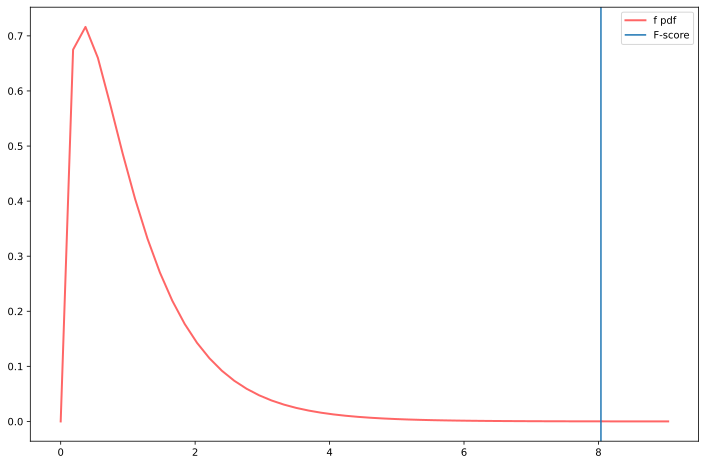

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

plt.figure(figsize=(12,8))
dfn, dfd = df_beetwen,df_within
x = np.linspace(0, F+1)

plt.plot(x, f.pdf(x, dfn, dfd),'r-', lw=2, alpha=0.6, label='f pdf')
plt.axvline(x=F, label='F-score')
plt.legend()

print("P:", f.pdf(F, dfn, dfd))

**Способ 3**

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula="expr ~ Therapy", data=data).fit()
res = sm.stats.anova_lm(model, typ= 1)
res

,df,sum_sq,mean_sq,F,PR(>F)
Therapy,3.0,560.716667,186.905556,8.037302,0.000152
Residual,56.0,1302.266667,23.254762,NaN,NaN


**Что в таблице?**
Therapy - представляет независимую переменную, где df- число степеней свободы и sum_sq (SSB - межгрупповая сумма квадратов). Разделим SSB на число степеней свободы, получаем mean_sq ($MS_{bg}$).

В качестве остаттка (Residual), данная изменчивость обусловленна внутри групп (внутригрупповая изменчивость).

F-значение представляет собой отношение междугрупповой изменчивости к внутрегрупповой.


p-value составил 0.00015 что меньше чем 0.05. Вероятность получить такое или ещё более выраженное отклонение мы можем с вероятностью 0.00015 из-за чего мы можем отклонить нулевую гипотезу. Отклонение нулевой гипотезы позволяет нам сделать следующий вывод: Как минимум две группы значимо различаются.

**Визуализация результатов:**

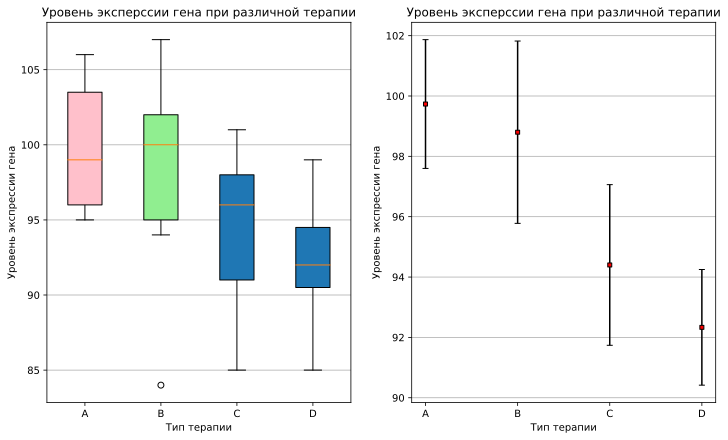

In [15]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

A = data.loc[data['Therapy'] == 'A', 'expr']
B = data.loc[data['Therapy'] == 'B', 'expr']
C = data.loc[data['Therapy'] == 'C', 'expr']
D = data.loc[data['Therapy'] == 'D', 'expr']

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = data.groupby('Therapy')['expr'].agg(['mean', 'std', 'count', 'sem'])
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

# график boxplot
bplot1 = ax1.boxplot([A, B, C, D],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['A', 'B', 'C', 'D']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Уровень эксперссии гена при различной терапии')
    ax.set_xlabel('Тип терапии')
    ax.set_ylabel('Уровень экспрессии гена')
    
plt.show()

Удалось выявить статистически значимую взаимосвязь типа терапии с показателем уровня экспрессии гена $(F(3.56)=8.04, p<0.05)$

<h1 style="color:black" align="center">2.5 Множественные сравнения в ANOVA</h1>
<h1 style="color:#008B8B">Множественные сравнения</h1>

Множественное сравнение возникает тогда, когда необходимо сравнить не две, а большее количество групп между собой. Почему мы не можем взять критерий $t$-стьюдента и попарно сравнить все возможные комбинации средних значений?

Смоделируем такую ситуацию. Предствим у нас есть ГС, где некоторый признак распределён нормально с средним равным $0$ и дисперсией равной $1$.

Из данной ГС будем многокрано извлекать выборки по N-элементов и сравнивать среднее значение этих выборок между собой. Так как ГС одна, то выборки не должны различаться. Но мы будем повторять данную итерацию $1000$ раз.

**Напишем код для проведения эксперементов**

In [1]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = [i for i in range(m)] # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()

**1000 раз извлекаем 2 выборки по 30 элементов и сравниваем их при помощи t-критерия, и различия будем считать значимыми если p-value < 0.05.**

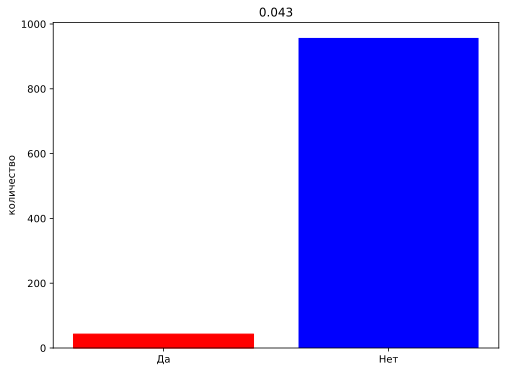

In [17]:
false_alarm(2, 30, 0.05)

**Результат:** В 5% случакв мы получили статистически значимые различия между двумя выборками, которые извллечены из одной ГС. На самом деле никаких различий быть не должно, но мы выбрали порог p-value после которого мы принимаем различия статистически достоверными. Поэтому иногда выпадают две выборки, которые значимо различаются между собой. 

**Увеличим объём выборок до 8 с теми же условиями:**

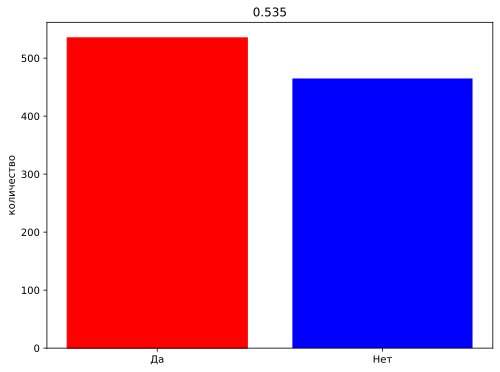

In [18]:
false_alarm(8, 30, 0.05)

**Результат:** В 52% случае мы получаем хотябы одно значимое различие между нашими 8 выборками. То есть, среди 1000 итераций, в 52% мы получили статистически значимые различия между хотябы одной выборкой.

**Увеличим объём выборок до 20**

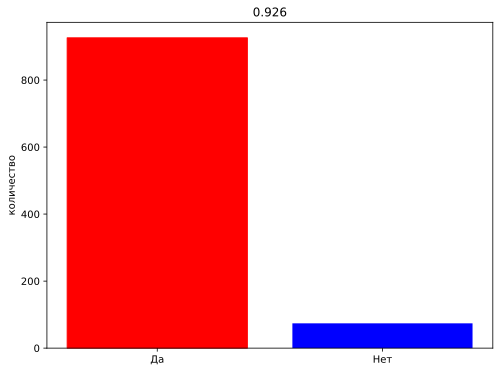

In [19]:
false_alarm(20, 30, 0.05)

**Результат:** В 91% случаев мы получаем хотябы одно значимое различие между парными сравнениями.

**Вывод:** Когда сравниваем две группы, то мы принимаем различия статистически достоверными, если p меньше некоторго показателя альфа. Это означает, что если различия в ГС нет то, в alpha % (5%) случаев мы будем получать эти различия случайно.

Что происходит, если мы сравниваем более двух групп и при этом всевозможные их комбинации, в таком случае вероятность получить хотябы одно значимое различие, совершенно случайно, становится больше чем alpha (0.05). А если групп к примеру 1000, то вероятность получить хотябы одно значимое различие будет стремится к 1.

Если мы взяли монетку и подбросили её один раз то, вероятность получить орла составит 0.5. А если мы взяли и подбросили монетку 1000 раз, то вероятность получить хотябы одного орла стремится 1.

Поэтому нам необходимо корректировать порог alpha ниже которого мы будем принимать статистически достоверными различия. Для этого используют "Поправки на множественных сравнениях"

<h1 style="color:#008B8B">Поправка Банферрони</h1>

Если вероятность ошибки первого рода (получить значимые различия там где их нет), возрастает пропорционально количеству групп, которые мы сравниваем междусобой (количеству гипотез, которые мы проверяем в нашем эксперементе) то и показатель alpha тоже нужно корректировать.

Поправка Банферрони предлогает простое решение: Если мы хотим удержать вероятность ошибки на уровне 0.05 то, мы должны alpha разделить на количество парных сравнений. Например, у нас есть 8 групп, то мы делаем 28 парных сравнений, и если мы хотим получать вероятность ошибки на уровне 0.05, тогда необходимо показатель alpha разделить на 28.

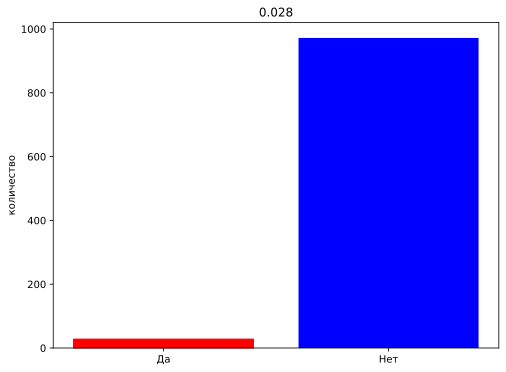

In [20]:
false_alarm(8, 30, 0.05 / 28)

**Резултат:** Мы 1000 раз извлекаем по 8 выборок из ГС и принимаем различия статистически достоверными если p меньше нового показателя alpha. И только в 4% случаев мы получим хотябы одно значимое различие. 

**Вывод:** Недостаток поправки Банферрони заключается в том, что при большом количестве сравнений трудно получить значимые различия. Поэтому были разработаны другие виды поправок.

<h1 style="color:#008B8B">Поправка Тьюки (Tukey HSD)</h1>

Вернёмся к примеру со сравнение 4-х типов терапии по эффективности и посмотрим как работает критерий Тьюки.

В данном критерии мы рассчитываем доверительный интервал разницы между средними значениями. Если такой доверительный интервал не включает в себя ноль, тогда можно отклонить нулевую гипотезу о равенстве средних значений. 

**Почему так?**

Если бы многократно извлекали выборки одинкового размера из ГС, в каждой выборке рассчитывали среднее значение и для него свой 95% доверительный интервал ($\bar{x} \pm 1.96 se$), то в 95% всех случаев, такой интервал включал бы в себя срденее ГС. Мы можем быть на 95% уверены, что он включает в себя срденее ГС.

Следовательно елси доверительный интервал не включает в себя ноль, тогда разница между двумя средними не равняется 0, значит, два выборочных средних различаются между собой. Можем отклонить нулевую гипотезу о равенстве средних.

**Код на доработку метода:**

In [21]:
# dependent - зависимая переменная (тип перапии)
# independent - независимая переменная (значение терапии)
def ssw_method(data, group_data, dependent, independent):
    ssw = 0
    for i in data.index:  # Проход по индексу данных
        type_therapy = data.iloc[i][dependent]  # Определяем тип терапии для данной еденицы данных
        ssw += (data.iloc[i][independent] - group_data.loc[type_therapy]['mean']) ** 2 # Рассчёт показателя ssw
    return ssw, len(data) - len(group_data)

def MS_wg_method(ssw, df_wg):
    return ssw / df_wg

def tukey(data, dependent, independent):
    group_data = data.groupby(dependent)[independent].agg(['mean', 'std', 'count'])
    ssw, df_wg = ssw_method(data, group_data, dependent, independent)
    MS_wg = MS_wg_method(ssw, df_wg)
    return MS_wg

print(tukey(data, 'Therapy', 'expr'))

23.254761904761903


**Визуализация критерия**

<img src="img/2_5.png" width="800" height="460">

Мы видим что группы C-A, D-A, D-B не включают 0  в свой доверительный интервал разницы между средними. Значит, у нас группа C и A значимо различаются между собой, группа D значимо отличается от A, группа D значимо отличается от группы B.

**Для чего нужна эта поправка?**

Допустим, мы рассчитали t-тест для сравнения двух групп A, B, где p-value равен 0.071 что больше чем 0.05. Но поправка Тьюки включает ноль в доверительный интервал, следовательно отклонить нулевую гипотзу мы уже не можем.

**Вывод:** Если мы сравниваем n групп и не используем множественную поправку, то будет много критики по поводу правильности статистических выводов. Если мы применяем поправку Банферрони и у нас остались значимые различия, тогда из-за консервативности, скорее всего результаты будут естественными.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

data_stepik = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

MultiComp = MultiComparison(data_stepik['expr'], data_stepik['Therapy'])

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


In [44]:
df

,group1,group2,meandiff,p-adj,lower,upper,reject,category,orderby
0,A,B,-0.9333,0.9000,-5.5961,3.7294,False,A-B,6
1,A,C,-5.3333,0.0189,-9.9961,-0.6706,True,A-C,5
2,A,D,-7.4000,0.0010,-12.0628,-2.7372,True,A-D,4
3,B,C,-4.4000,0.0712,-9.0628,0.2628,False,B-C,3
4,B,D,-6.4667,0.0029,-11.1294,-1.8039,True,B-D,2
5,C,D,-2.0667,0.6296,-6.7294,2.5961,False,C-D,1


Text(0.5, 1.0, '95% family-wise confidence level')

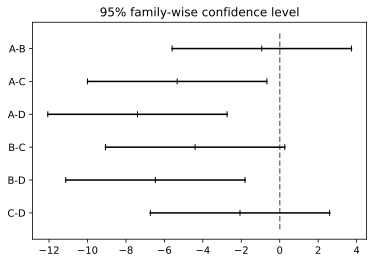

In [53]:
data = MultiComp.tukeyhsd()._results_table.data
df = pd.DataFrame(data[1:], columns=data[0])

df['category'] = df['group1'] + ['-'] * len(df) + df['group2']
df['orderby'] = range(len(df), 0, -1)

for lower, upper, meandiff, y in zip(df['lower'], df['upper'], df['meandiff'], df['orderby']):
    plt.plot((lower, upper), (y, y), '|-', color='black')
    plt.plot(meandiff, y ,'|-', color='black')
    
plt.yticks(df['orderby'], df['category'])
plt.vlines(0, df['orderby'].min() - 0.5, df['orderby'].max() + 0.5, linestyles='dashed', color='gray')
plt.title('95% family-wise confidence level')

<h1 style="color:black" align="center">2.6 Многофакторный ANOVA</h1>
<h1 style="color:#008B8B">Двухфакторный дисперсионный анализ (Two-way analysis of variance)</h1>

В данном методе мы можем учитывать взаимосвязь зависимой переменной не с одним фактором (номинативная переменная), а с двумя.

### Пример 1

Атеросклероз довольно опасное заболевание - причина ишемической болезни сердца и инсультов. Анализ экспрессии генов лейкоцитов позволяет предсказать вероятность развития данного заболевания. В эксперименте исследовался уровень экспрессии в зависимости от возраста пациентов и дозировки лекарства аторвастатина.

Возраст является независимой переменной и имеет две градации (молодые, пожилые). Ещё одна независимая переменная - это дозировка лекарства, которая имеет тоже две градации (высокая, низкая). Таким образом, мы имеем 4 группы.

In [150]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('input/atherosclerosis.csv')
data.head()

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1


---

### Составление базоваой таблицы

In [151]:
group = data.groupby(['age', 'dose'])['expr'].agg(['mean', 'std', 'count', 'sem'])
group

mean       std  count       sem
age dose                                       
1   D1    104.758464  5.863454     16  1.465863
    D2    105.545864  4.369024     16  1.092256
2   D1    101.004805  5.116310     16  1.279078
    D2    102.273629  5.135374     16  1.283844

In [152]:
mean_age1 = data[data['age'] == 1]['expr'].mean()
mean_age2 = data[data['age'] == 2]['expr'].mean()

mean_D1 = data[data['dose'] == 'D1']['expr'].mean()
mean_D2 = data[data['dose'] == 'D2']['expr'].mean()

mean_of_mans = (mean_age1 + mean_age2) / 2

### Фактор 1 SSB_A

**sum of squares (D1)**

In [153]:
sum_of_squares_D1 = len(data[data['dose'] == 'D1']) * (mean_D1 - mean_of_mans) ** 2
sum_of_squares_D1 

8.45612029667425

**sum of squares (D2)**

In [154]:
sum_of_squares_D2 = len(data[data['dose'] == 'D2']) * (mean_D2 - mean_of_mans) ** 2
sum_of_squares_D2

8.456120296674717

In [155]:
sum_of_squares_for_1st_factor = sum_of_squares_D1 + sum_of_squares_D2
sum_of_squares_for_1st_factor

16.91224059334897

### Фактор 2 SSB_B

**sum of squares (age 1)**

In [156]:
sum_of_squares_age1 = len(data[data['age'] == 1]) * (mean_age1 - mean_of_mans) ** 2
sum_of_squares_age1 

98.72637705587476

**sum of squares (age 1)**

In [157]:
sum_of_squares_age2 = len(data[data['age'] == 2]) * (mean_age2 - mean_of_mans) ** 2
sum_of_squares_age2 

98.72637705587476

In [158]:
sum_of_squares_for_2st_factor = sum_of_squares_age1 + sum_of_squares_age2
sum_of_squares_for_2st_factor

197.45275411174953

### SSW

**D1**

In [162]:
data[(data['dose'] == 'D1') & (data['age'] == 2)]

,expr,age,dose
16,101.062276,2,D1
17,100.763332,2,D1
18,94.290992,2,D1
19,90.970949,2,D1
20,105.030672,2,D1
21,98.455295,2,D1
22,97.030269,2,D1
23,104.207160,2,D1
24,102.128773,2,D1
25,98.293741,2,D1


In [213]:
D1_age1_mean = data[(data['dose'] == 'D1') & (data['age'] == 1)]['expr'].mean()
D1_age2_mean = data[(data['dose'] == 'D1') & (data['age'] == 2)]['expr'].mean()

In [214]:
sum_d1 = 0
for expr in data[(data['dose'] == 'D1') & (data['age'] == 1)]['expr']:
    sum_d1 += (expr - D1_age1_mean)**2
for expr in data[(data['dose'] == 'D1') & (data['age'] == 2)]['expr']:
    sum_d1 += (expr - D1_age2_mean)**2
sum_d1

908.3507808695523

**D2**

In [215]:
D2_age1_mean = data[(data['dose'] == 'D2') & (data['age'] == 1)]['expr'].mean()
D2_age2_mean = data[(data['dose'] == 'D2') & (data['age'] == 2)]['expr'].mean()

In [216]:
sum_d2 = 0
for expr in data[(data['dose'] == 'D2') & (data['age'] == 1)]['expr']:
    sum_d2 += (expr - D2_age1_mean)**2
for expr in data[(data['dose'] == 'D2') & (data['age'] == 2)]['expr']:
    sum_d2 += (expr - D2_age2_mean)**2
sum_d2

681.9066427342816

In [217]:
ssw = sum_d1 + sum_d2
ssw

1590.257423603834

---

**Группировка данных**

In [4]:
data.groupby(['age', 'dose'])['expr'].agg(['mean', 'std', 'count', 'sem'])

mean       std  count       sem
age dose                                       
1   D1    104.758464  5.863454     16  1.465863
    D2    105.545864  4.369024     16  1.092256
2   D1    101.004805  5.116310     16  1.279078
    D2    102.273629  5.135374     16  1.283844

**Применим дисперсионный анализ**

In [13]:
model = ols(formula="expr ~ age+dose", data=data).fit()
res = sm.stats.anova_lm(model, typ=1)
res

,df,sum_sq,mean_sq,F,PR(>F)
dose,1.0,16.912241,16.912241,0.648351,0.423830
age,1.0,197.452754,197.452754,7.569592,0.007804
Residual,61.0,1591.184501,26.084992,NaN,NaN


Residual - внутригрупповая изменчивость, которая рассчитывается по формуле число наблюдений минус число групп. 

Число степеней свобод составит 60, если мы учитываем взаимодействие age и dose.

Основная идея двухфакторного дисперсионного анализа сводится к тому, что теперь у нас общая изменчивость (SStotal) будет складываться из 4-х компонентов:
* Внутригрупповая изменчивость SSW
* Изменчивость обусловленная влиянием первого фактора SSB_A
* Изменчивость обусловленная влиянием второго фактора SSB_B
* Изменчивость обусловленная взаимодействием этих двух факторов SSB_A * SSB_B

$$\large SStotal = SSW + SSB_A + SSB_B + SSB_A \cdot SSB_B$$

Для показателя Фактор возраста (Age) и Фактора дозировки (Dose) рассчитано количество степеней свобод. Большая часть изменчивость `Mean Sq = 197.45` обусловленна фактором возраста, а факторо дозировки (Dose `Mean Sq = 16.91`) и внутригрупповая изменчивость (Residual `Mean Sq = 26.08`) оказались не столь значительными.

Исходя из этого мы видим, что p-value оказался меньше 0.05 только в ситуации возраста наших испытуемых.

### Зависимость от фактора возроста:

<img src="img/2_6_1.png" width="800" height="460">

Фактор возраста имеет большую значимость, так как внезависимости от дозировки молодые пациенты получили более высокие показатели зависимой переменной, чем пожилые пациеныт. И среднее значение у красных доверительных интервалов выше, чем для синих. 

Тем самым, значимый эффект оказался для фактора возраста пациентов, но незначимый эффект для фактора дозировки.

### Пример 2 Ситуация, когда оба фактора являются значимыми:

<img src="img/2_6_2.png" width="800" height="460">

Для возраста и дозировки p-value оказался меньше 0.05. Это проявляется в том, что в ситуации низкой дозировки уровень экспресии гена меньше у молодых и пожилых, чем в у высокой дозировки. Это наблюдается в том, что среднее значение групп у низкой дозировки расположено ниже, чем у групп с высокой дозировкой.

Дополнительно к этомоу, молодые пациенты внезависимости от дозировки обладают более высокой экспрессией генов, чем пожилые пациенты. 

В этой ситуации влияние оказывает факт дозировки на зависимую переменную и ещё присутствует влияние возраста.


**Критерий Тьюки**

Справа наблюдаем критерий Тьюки. Y - молодая пациенты, 1 - с низкой дозировкой, O - пожилые пациенты, 2 - с высокой дозировкой. Мы наблюдаем значимые различия для двух групп (Y-1, O-1) и для (Y-2, O-1).

`(Y-1, O-1)` - В ситуации низкой дозировки, среднее значение группы молодых пациентов, значимо различается от среднего значения группы пожилых пациентов. 

`(Y-2, O-1)` - В ситуации высокой дозировки группы молодых пациентов, значиомо различается от группы пожилых пациентов с низкой дозировкой.

**Вывод:** То, что у нас оказались значимы оба фактора (фактор возраста, фактор дозировки) не означает, что все 4 группы должны различаться междусобой. При парном сравнени, только две группы значимо различаются между другими двумя `(Y-1, O-1)` и `(Y-2, O-1)`, именно они вносят вклад в значимые различия.

Если бы мы усреднили наши данные: сравнили только среднее значение молодых пациентов и пожилых, тогда мы получили бы значимые различия. И значыемые различия получили если бы мы сравнили только по фактору дозировки без учёта возраста.

### Вывод:

Таким образом дисперсионный анализ позволяет смотреть влияние нескольких факторов на нашу зависимую переменную. Мы можем добавить ещё определённые факторы, например, фактор пола и тогда, мы получим трёхфакторный дисперсионный анализ. И проверялись бы гипотезы о влиянии фактора возраста, о влиянии фатора дозировки и фактора пола на уровень экспрессии гена. 

Плюс, ещё гипотезы о взаимодействии факторов.

### Пример 3

<img src="img/2_6_3.png" width="800" height="460">

Независимая переменная 1 - это инъекция. Независимая переменная 2 - это пол. В качестве зависимой переменной выступает концентрация кальция.

Как мы видим, фактор пола и иньекции не оказали значимого влияния на зависимую переменную. Изменчивость которая обусловленна этими факторами весьма не вилика. Но взаимодействие этих факторов (Hormone:sex) оказало большое влияние, проявляется большей изменчивостью 89.48.

**Построим график результатов:**

<img src="img/2_6_4.png" width="800" height="460">

Сам факт инъекции по разному оказал влияние на концентрацию кальция в плазме, в зависимости от плоа особи. В случа мужского пола это привело к увеличению интересующего нас показателя, а в случае женской особи, это привело к снижению показателя кальция в плазме.

В этом и заключается, основная идея взаимодействия факторов, что некоторая переменная оказывает различное влияние на интересующий нас показатель в зависимости от уровня другой независимой переменной. Если ни один фактор не оказывает влияние на интересующий нас показатель, тогда данные факторы могут необычным образом взаимодействовать междусобой, что мы наблюдаем в примере выше.

Как мы наблюдаем, что дополнительный фактор оказывает разное воздействие на два факора, взаисимости от того, была инъекция или нет. В прошлом примере, когда были значимы оба фактора, то дозировка оказывала влияние сразу на два фактора, повышая среднее значение зависимой переменной.

Дисперсионный анализ не ограничен количество факторов, которые мы можем включать в наши данные, но тогда анализ взаимодействия факторов становится затруднительным, когда число факторов больше 3.

### Задача 1

Компания, разрабатывающая мобильные телефоны, перед выпуском двух новых моделей (№1 и №2), решила выяснить, как потенциальные пользователи воспринимают эти новинки . Для этого компания набрала фокус-группу (100 мужчин, 100 женщин) и попросила участников оценить дизайн новых моделей телефонов от 1 до 100. Чтобы проанализировать полученные результаты, был применен двуфакторный дисперсионный анализ (зависимая переменная - оценка испытуемых по 100-балльной шкале, независимые переменные (факторы) - номер модели и пол испытуемых). 

Соотнесите графики результатов (A, B, C, D) и различные результаты исследования. 

<img src="img/2_6_5.png" width="800" height="460">

А) Модель телефона №1 (отмечена на горизонтальной оси) была оценена и женщинами (красная линия), и мужчинами (синяя линия) одинаково (средняя оценка — около 80, отмечена на вертикальной оси).  Модель телефона №2 (отмечена на горизонтальной оси) была оценена и женщинами, и мужчинами тоже одинаково (и те, и другие оценили её в среднем где-то на 65). Отсюда делаем вывод, что значимый эффект на результат оказала именно модель телефона, а не различие пола испытуемых.

B) Женщины оценили модель №1 и модель №2 примерно одинаково высоко (средняя оценка — около 80), в то время как мужчины тоже оценили модель №1 и модель №2 одинаково, но меньше (средняя оценка — около 65). Значимый эффект обусловлен только полом испытуемых: женщины оценили обе модели одинаково выше, чем мужчины. 

C) Модель №1 и женщины, и мужчины оценили по-разному. Модель №2 и женщины, и мужчины тоже оценили по-разному. А также мы можем видеть, что модель №1 была оценена обеими группами испытуемых выше, чем модель №2. Отсюда следует, что на результат оказали влияние и модель телефона, и пол (значимый эффект для обоих факторов).

D) Наблюдаем более высокую оценку для модели №2 по сравнению с оценкой модели №1 у мужчин и более низкую оценку модели №2 по сравнению с оценкой модели №1 у женщин. Такой график соответствует значимому взаимодействию факторов. 

<h1 style="color:#008B8B">Требования в дисперсионном анализе</h1>

Должны выполняться два условия:
1) Нормальность распределения зависимой переменной в каждой из групп;

2) Гомогенность дисперсии - дисперсия должна быть примерно одинаковой в каждой из групп.

Дисперсионный анализ устойчивый при нарушеннии данных условий, например при 50 наблюдениях. 

Если мы говорим про гомогенность дисперсии, можно построить box-plot и посмотреть есть ли заметные выбросы.

<img src="img/2_6_6.png" width="800" height="460">

Ещё можно использовать тест Левина для проверки гомогенности дисперсии. Он проверяет нулевую гипотезу о том, что все дисперсии равны $D_1 = D_2 = D_3 = D_4$, если мы получаем не значимые различия, то p-value должен получиться больше 0.05 и у нас нет оснований отклонять нулевую гипотезу.

Есил говорить о нормальном распределении, то мы можем построить график QQ-plot для каждой из групп и убедиться в том, что большинство точек лежит близко с линией нормального распределения.

<img src="img/2_6_7.png" width="800" height="460">

### Замечание по дисперсионному анализу

Например мы решили выяснить кто лучше разбирается в статистике, математики, психологи или биологи. Применив дисперсионный анализ, то значимые различия между группами может означать две веши:

* Те кто занимаются математикой, действительно лучше понимают статистику;
* Так и то, что те, кто хорошо понимают статистику, становятся математиками, а не психологами, например.

Поэтому дисперсионный анализ проверяет гипотезу о взаимосвязи номинативной переменной (тип профессии) и некоторой количественной переменной (скорость успеваемости в статистике). Поэтому важно, задать вопрос, а возможно объяснить наши данные с другой стороны. Вдруг не факторы оказывают влияние на количественную переменную, а наоборо, разные градации количественной переменной обуславливают разделение на группы наших наблюдений.